In [1]:
from geotile import GeoTile 

In [5]:
PATH_TEST_X = r'C:\Users\jabir\Project\UNet\data\Pidie_2022-06_test.tif'
PATH_TEST_Y = r'C:\Users\jabir\Project\UNet\data\1109_sawah_test.shp'

In [6]:
PATH_TRAIN_X = r'C:\Users\jabir\Project\UNet\data\Pidie_2022-06_train.tif'
PATH_TRAIN_Y = r'C:\Users\jabir\Project\UNet\data\1109_sawah_train.shp'

In [7]:
gt_train = GeoTile(PATH_TRAIN_X)
gt_train.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 2007,
 'height': 2144,
 'count': 3,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.00036613514077670303, 0.0, 95.74337815246122,
        0.0, -0.0003646272879999966, 5.439188035472024)}

In [8]:
gt_train.generate_tiles(r'C:\Users\jabir\Project\UNet\data\train', prefix='train_')

In [9]:
gt_train.rasterization(PATH_TRAIN_Y, r'C:\Users\jabir\Project\UNet\data\y_train.tif')

c:\Users\jabir\anaconda3\envs\tf\lib\site-packages\rasterio\features.py:324: ShapeSkipWarning: Invalid or empty shape None at index 0 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
c:\Users\jabir\anaconda3\envs\tf\lib\site-packages\rasterio\features.py:324: ShapeSkipWarning: Invalid or empty shape None at index 2 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
c:\Users\jabir\anaconda3\envs\tf\lib\site-packages\rasterio\features.py:324: ShapeSkipWarning: Invalid or empty shape None at index 3 will not be rasterized.
  warnings.warn('Invalid or empty shape {} at index {} will not be rasterized.'.format(geom, index), ShapeSkipWarning)
c:\Users\jabir\anaconda3\envs\tf\lib\site-packages\rasterio\features.py:324: ShapeSkipWarning: Invalid or empty shape None at index 4 will not be rasterized.
  warnings.

In [10]:
gt_train_y = GeoTile('../UNet/data/y_train.tif')

In [11]:
gt_train_y.generate_tiles(r'C:\Users\jabir\Project\UNet\data\train_y', prefix='train_')

In [12]:
gt_test = GeoTile(PATH_TEST_X)

gt_test.generate_tiles('../UNet/data/test_x', prefix = 'test_x_')

gt_test.rasterization(PATH_TEST_Y, '../UNet/data/y_test.tif')

In [13]:
gt_test_y = GeoTile('../UNet/data/y_test.tif')
gt_test_y.generate_tiles('../UNet/data/test_y', prefix = 'test_y_')


In [14]:
# generate tiles and store it inside geotile package
gt_train.generate_tiles(save_tiles=False)
gt_train_y.generate_tiles(save_tiles=False)

# preprocessing (eg. convert nan to zero and normalization of tiles)
gt_train.convert_nan_to_zero()
# gt_train.normalize_tiles()

# save it as a numpy array
# gt_train.save_numpy('../../data/end_to_end_DL/X_train.npy')
# gt_train_y.save_numpy('../../data/end_to_end_DL/y_train.npy')

In [15]:
gt_train.normalize_tiles()

In [16]:
import numpy as np
gt_train.tile_data.min(), gt_train.tile_data.max()

(0.0, 1.0)

In [17]:
gt_train.save_numpy('../../Project/UNet/data/X_train.npy')
gt_train_y.save_numpy('../../Project/UNet/data/y_train.npy')

In [18]:
# generate tiles and store it inside geotile package
gt_test.generate_tiles(save_tiles=False)
gt_test_y.generate_tiles(save_tiles=False)

# preprocessing (eg. convert nan to zero and normalization of tiles)
gt_test.convert_nan_to_zero()
gt_test.normalize_tiles()

# save it as a numpy array
gt_test.save_numpy('../UNet/data/X_test.npy')
gt_test_y.save_numpy('../UNet/data/y_test.npy')

In [10]:
import numpy as np

X_train = np.load('../../Project/UNet/data/X_train.npy')
X_train.max(), X_train.min(), X_train.dtype, X_train.shape

(1.0, 0.0, dtype('float32'), (272, 256, 256, 3))

In [11]:
y_train= np.load('../../Project/UNet/data/y_train.npy')

53


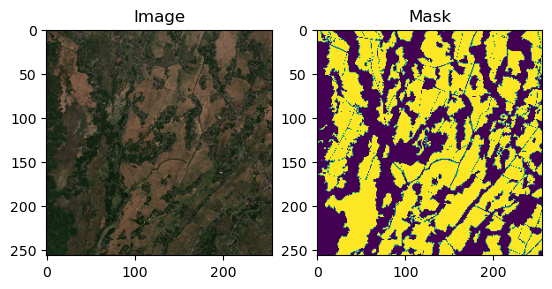

In [54]:
import matplotlib.pyplot as plt

# Let's plot a sample input RGB image and output image with buildings
fig, (ax1, ax2) = plt.subplots(1,2)
img = np.random.randint(53,59)
print(img)
ax1.imshow(X_train[img, :, :, :3])
ax2.imshow(y_train[img, :, :, 0])
ax1.set_title("Image")
ax2.set_title('Mask')
plt.show()

In [1]:
import numpy as np

X_test = np.load('../UNet/data/X_test.npy')
X_test.max(), X_test.min(), X_test.dtype, X_test.shape

(1.0, 0.0, dtype('float32'), (12, 256, 256, 3))

In [2]:
y_test= np.load('../UNet/data/y_test.npy')

6


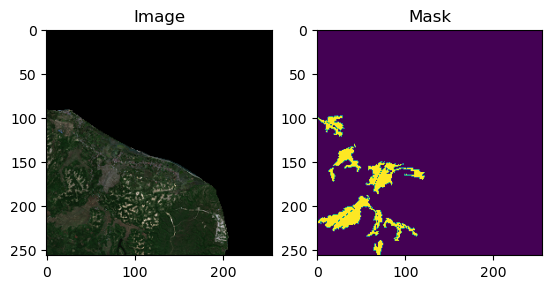

In [58]:
import matplotlib.pyplot as plt

# Let's plot a sample input RGB image and output image with buildings
fig, (ax1, ax2) = plt.subplots(1,2)
img = np.random.randint(0, 12)
print(img)
ax1.imshow(X_test[img, :, :, :3])
ax2.imshow(y_test[img, :, :, 0])
ax1.set_title("Image")
ax2.set_title('Mask')
plt.show()